In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## 数据预处理

In [2]:
# 读取数据
df = pd.read_csv('sale_order.csv')
# 查看数据
print(df.head(10)) # 结果见表1-1


              订单编号        订单时间    SKU编号  发货件数    发货仓库
0  POD-190405-0031    2019/4/8  LG32118    50  RDC_杭州
1  POD-190711-0083   2019/7/11  LG32118    10  RDC_杭州
2  POD-210318-0146   2021/3/19  LG32118    30  RDC_杭州
3  POD-210302-0071    2021/3/2  LG32118    10  RDC_杭州
4  POD-210422-0218   2021/4/23  LG32118    50  RDC_杭州
5  POD-210323-0170   2021/4/13  LG32118    30  RDC_杭州
6  POD-211116-0190  2021/11/17  LG32118    32  RDC_杭州
7  POD-211007-0025   2021/10/7  LG32118    10  RDC_杭州
8  POD-200706-0127   2020/7/23  LG32118    30  RDC_杭州
9  POD-210818-0096   2021/8/24  LG32118    15  RDC_杭州


## 数据清洗

In [3]:
# 利用条件筛选对异常值进行清洗
df = df[df['发货件数']>=0]

# 利用空值筛选对空值行进行删除
df = df[~df['发货仓库'].isnull()]

# 日期清洗函数，对于异常值和早于2018年1月1日的订单进行空值处理
def datewash(x):
    try:
        x = pd.to_datetime(x)
        if x>pd.to_datetime('2018-01-01'):
            return x
        else:
            return 
    except:
        return
    
# 对日期相关字段进行数据清洗 
df['订单时间'] = df['订单时间'].apply(datewash)
df = df[~df['订单时间'].isnull()]

# 为了便于后续操作，我们筛选字段，并进行重命名
df = df[['SKU编号', '发货仓库', '订单时间', '发货件数']]
df = df.rename(columns={'SKU编号':'SKU', '发货仓库':'ware_house', '订单时间': 'order_date', '发货件数': 'y'})

## 替换链处理

In [4]:
# sku最大最小日期、订单数量统计查看
print(df.groupby('SKU')['order_date'].agg(['min','max']))

               min        max
SKU                          
LG31852 2018-07-30 2021-01-25
LG32021 2018-01-08 2018-07-23
LG32108 2018-08-06 2019-05-27
LG32118 2019-04-08 2021-11-17
LG32234 2020-01-27 2020-07-06
LG32310 2020-07-13 2021-01-18
LG32498 2021-02-01 2021-12-13
LG32568 2021-12-20 2022-04-18
LG32875 2022-04-25 2022-10-31
LG33472 2022-11-07 2022-12-26


In [5]:
replace_data = pd.read_csv('replace_chain.csv')
print(replace_data)

   before_sku replace_sku
0     LG31852     LG31853
1     LG31853     LG31865
2     LG31865     LG31869
3     LG31869     LG31752
4     LG31752     LG32252
5     LG32252     LG46552
6     LG46552     LG68552
7     LG31852     LG32021
8     LG32021     LG32108
9     LG32108     LG32118
10    LG32118     LG32234
11    LG32234     LG32310
12    LG32310     LG32498
13    LG32498     LG32568
14    LG32568     LG32875
15    LG32875     LG33472
16    LG33472     LG68552


In [6]:
replace_data = pd.read_csv('replace_chain.csv')
def replace_chain(replace_data,order_data):
    '''
    替换链数据处理函数

    Args:
        replace_data (pandas DataFrame): 原始替换链数据，包含'before_sku','replace_sku'字段
        order_data (pandas DataFrame): 原始订单数据，包含'sku'字段
    Returns:
        replace_chain_data (pandas DataFrame): 替换链梳理后的数据，包含'before_sku','replace_sku'字段
    '''
    replace_chain_data = replace_data.copy()
    relace_dic = dict(replace_data[['before_sku','replace_sku']].values)
    while len(set(replace_chain_data['before_sku']).intersection(set(replace_chain_data['replace_sku']))) != 0:
        replace_chain_data['replace_sku'] = replace_chain_data['replace_sku'].apply(lambda x: relace_dic[x] if x in relace_dic.keys() else x)
        ring_check = replace_chain_data[replace_chain_data['before_sku'] == replace_chain_data['replace_sku']]['before_sku'].values
        if len(ring_check) > 0:
            raise Exception("替换链有环", ring_check)
    final_relace_dic = dict(replace_chain_data[['before_sku','replace_sku']].values)
    order_data['SKU'] = order_data['SKU'].apply(lambda x: final_relace_dic[x] if x in final_relace_dic.keys() else x)
    return order_data

# 使用函数对原始数据进行替换链处理
df = replace_chain(replace_data,df)           
        
        

## 图像绘制

/var/folders/zy/8k_65gtn70nfmssdhsky0fx80000gp/T/ipykernel_9119/1919370874.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Figure size 640x480 with 0 Axes>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Users/zhengxiaohang1/anaconda3/lib/python3.11

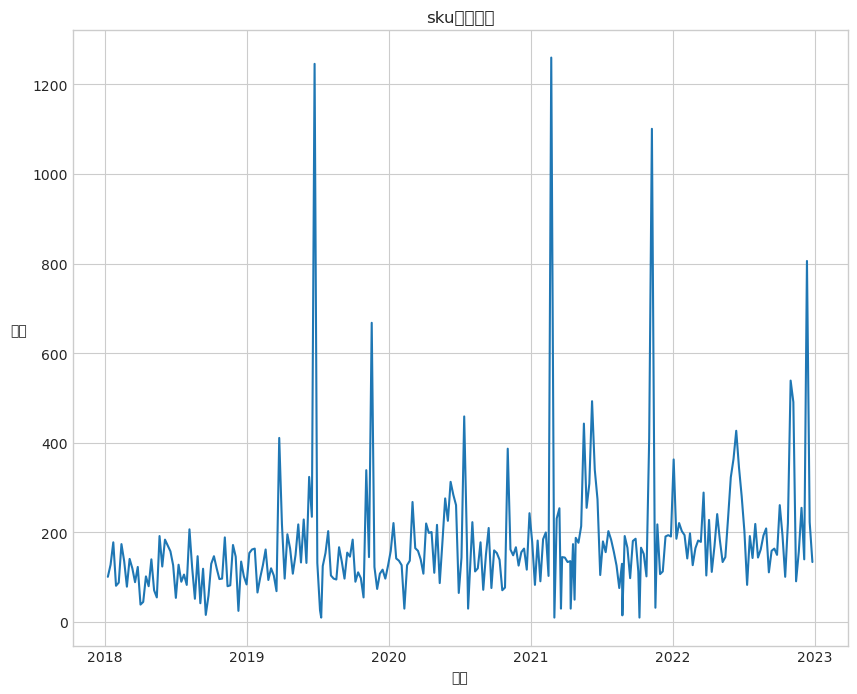

In [7]:
def y_plot(df,title,file_name):
    # 使用图像风格
    plt.style.use('seaborn-whitegrid')
    # 为了正常显示中文与图示
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    fig = plt.gcf()
    
    fig, ax = plt.subplots(figsize=(10, 8))
    # 查看数据折线图
    df_table = pd.pivot_table(df,index='SKU',columns='order_date',values='y').fillna(0)
    # 设置画布
    ax = plt.subplot(1,1,1)
    # 以日期为x轴，绘制销量的折线图
    x = pd.to_datetime(df_table.columns.tolist())
    ax.plot(x, df_table.sample(1).values.reshape(-1,1))
    # 设置图像标题、x轴、y轴的标签
    ax.set_title(title)
    ax.set_xlabel('日期')
    ax.set_ylabel('销量',labelpad = 10,rotation=0)
    # 设置x轴上每月的定位符-年
    ax.xaxis.set_major_locator(mdates.YearLocator()) # interval = 1
    # 设置日期的格式
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#     plt.savefig('图片/{}.png'.format(file_name),dpi=200)
    # 显示图像
    plt.show()
    
    
# 绘制订单表
y_plot(df,'sku销量情况','1-1')


## 大单处理逻辑

/var/folders/zy/8k_65gtn70nfmssdhsky0fx80000gp/T/ipykernel_9119/1919370874.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Figure size 640x480 with 0 Axes>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Users/zhengxiaohang1/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) m

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


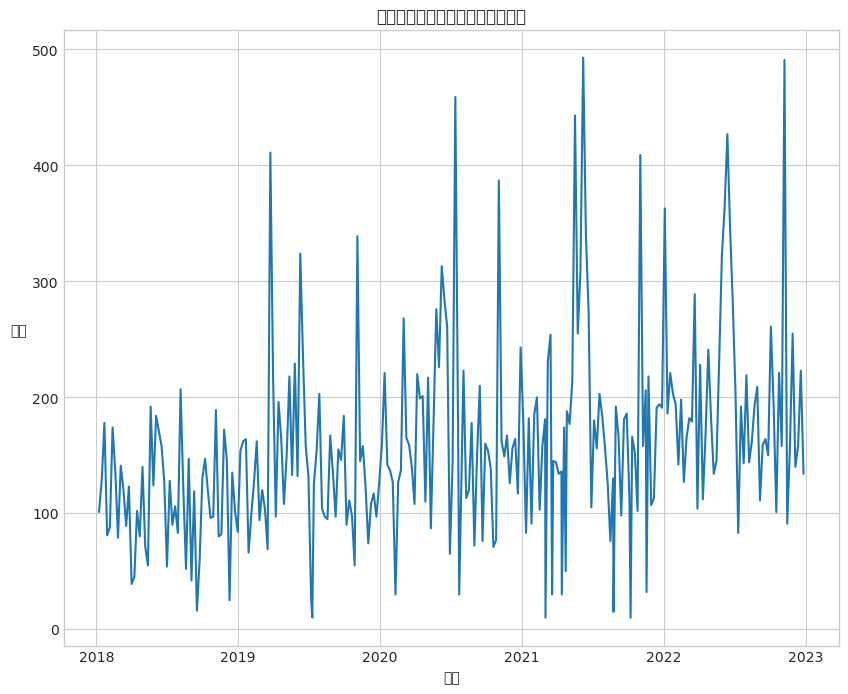

In [8]:
# 订单维度大单处理
# 销量回填

# 大单处理逻辑1：按阈值进行筛除
order_df1 = df.copy()
order_df1.loc[order_df1['y']>500,'y'] = order_df1.loc[order_df1['y']<=500,'y'].mean()
y_plot(order_df1,'按固定阈值剔除大单后的销量情况','1-2')

平均值=175.30、方差=147.88


/var/folders/zy/8k_65gtn70nfmssdhsky0fx80000gp/T/ipykernel_9119/1919370874.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Figure size 640x480 with 0 Axes>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Users/zhengxiaohang1/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) m

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


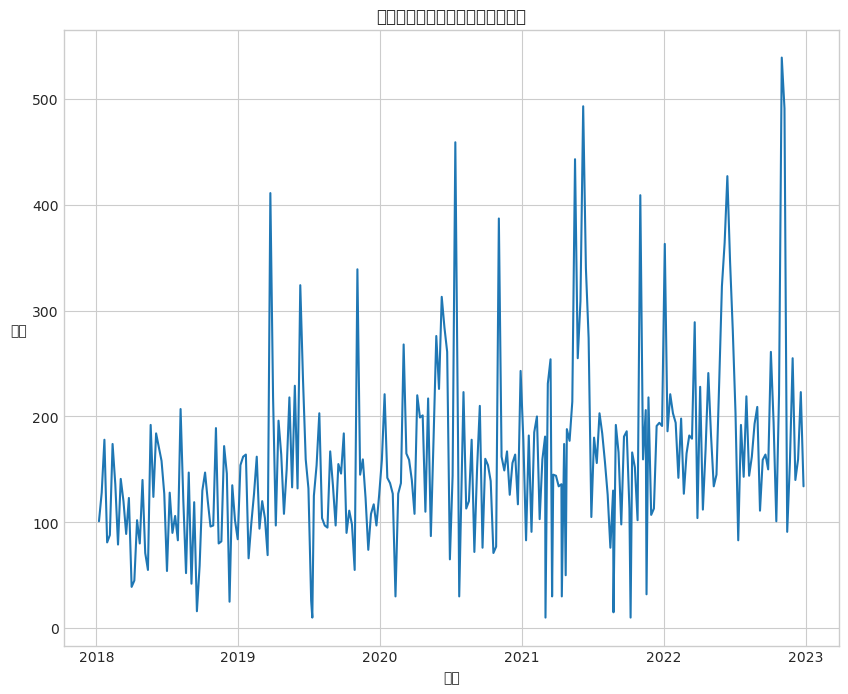

In [9]:
# 大单处理逻辑2：按分布进行筛除
# 导入scipy的正态分布包
from scipy.stats import norm
# 备份数据
order_df2 = df.copy()
# 计算历史销量均值和方差
y_mean = order_df2['y'].mean()
y_std = order_df2['y'].std()
print('平均值={:.2f}、方差={:.2f}'.format(y_mean,y_std))
# 计算上限阈值并识别填充
up_bond = y_mean + norm.ppf(0.9974) * y_std
order_df2.loc[order_df2['y']>up_bond,'y'] = order_df2.loc[order_df2['y']<=up_bond,'y'].mean()
# 查看折线结果
y_plot(order_df2,'按正态分布剔除大单后的销量情况','1-3')

## 时间维度聚合

       SKU ware_house  order_date    y
0  LG68552     RDC_杭州  2018-01-01  488
1  LG68552     RDC_杭州  2018-02-01  477
2  LG68552     RDC_杭州  2018-03-01  473
3  LG68552     RDC_杭州  2018-04-01  406
4  LG68552     RDC_杭州  2018-05-01  442


/var/folders/zy/8k_65gtn70nfmssdhsky0fx80000gp/T/ipykernel_9119/1919370874.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Figure size 640x480 with 0 Axes>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Users/zhengxiaohang1/anaconda3/lib/python3.11

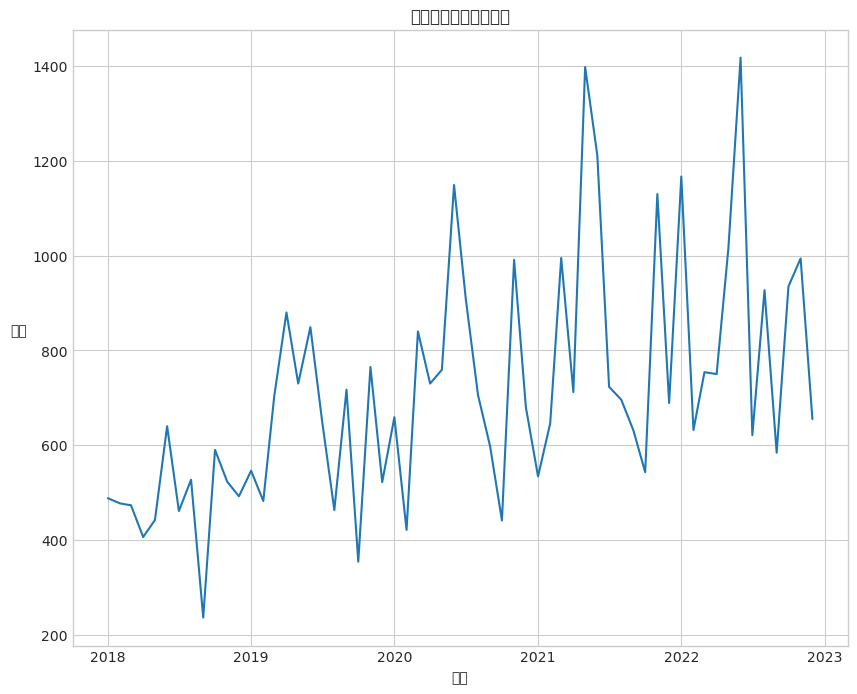

In [10]:
# 复制按第一种方式进行大单处理后的原始订单
order_df = order_df1.copy()
# 转化成时间格式，并抽取出年月格式
order_df['order_date'] = pd.to_datetime(order_df['order_date'])
order_df['order_date'] = order_df['order_date'].dt.strftime('%Y-%m-01')
order_df = order_df.groupby(['SKU','ware_house','order_date'])['y'].sum().reset_index()
# 聚合后的订单结果
print(order_df.head(5))
y_plot(order_df,'按月聚合后的销量情况','1-4')

## 探索性分析

In [11]:
# 查看整体均值
print(order_df['y'].mean())
# 查看整体方差
print(order_df['y'].std())
# 查看每天均值
print(order_df.groupby(order_df['order_date'].apply(lambda x:x[:4]))['y'].mean())
# 查看每月均值
print(order_df.groupby(order_df['order_date'].apply(lambda x:x[5:7]))['y'].mean())

711.0
249.66017581871264
order_date
2018    479.583333
2019    638.500000
2020    740.083333
2021    825.750000
2022    871.083333
Name: y, dtype: float64
order_date
01     678.8
02     531.6
03     753.2
04     695.6
05     869.0
06    1053.6
07     672.6
08     663.8
09     553.0
10     572.6
11     880.6
12     607.6
Name: y, dtype: float64


/var/folders/zy/8k_65gtn70nfmssdhsky0fx80000gp/T/ipykernel_9119/874261629.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


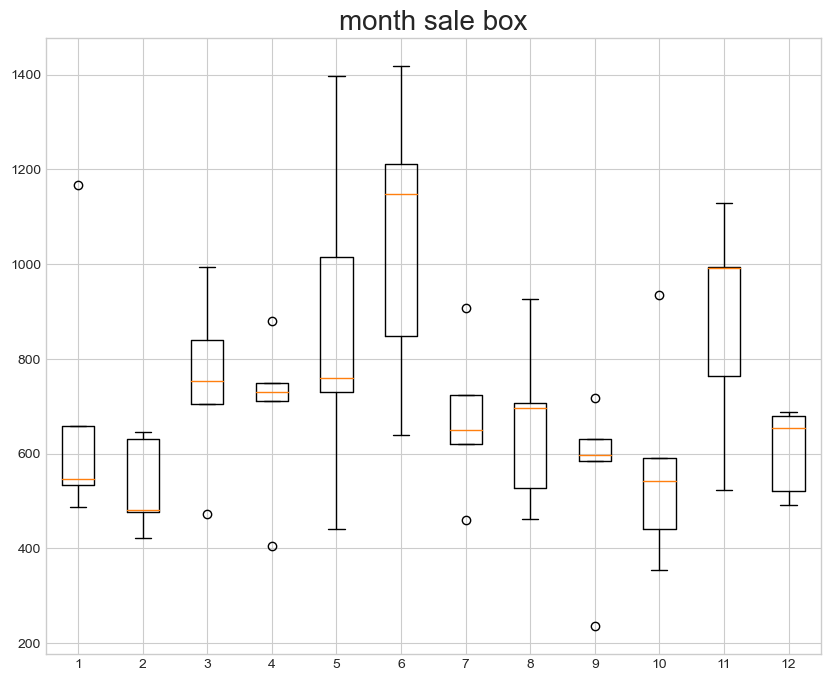

In [12]:
order_df['order_date'] = pd.to_datetime(order_df['order_date'])
order_df['month'] = order_df['order_date'].dt.month
month_list = order_df['month'].unique()
month_data = []
for i in range(len(month_list)):
    month_data.append(order_df[order_df['month']==month_list[i]]['y'])
    #设置画布参数
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,8))
plt.title('month sale box',fontsize=20)
labels = month_list
plt.boxplot(month_data, labels = labels)
plt.show()

## 时间序列特征

#### 趋势性特征

In [13]:
# 斜率法
# 核心是使用最小二乘法见序列拟合成一条直线。然后根据直线的斜率k判断序列的走势。
# 如果返回的是正数则正增长，如果返回的是负数，则为下降，如果为0则表示没有趋势。
# 优点：方法简单
# 缺点：要求趋势是线性的，当数去波动较大时，无法准确拟合。

# 导入相关包
from scipy import stats
import statsmodels.api as sm

y = order_df['y']

def trend_linetest(data):
    order=1
    index=[i for i in range(1,len(data)+1)]
    slope, intercept, r_value, p_value, std_err = stats.linregress(index, data)
    return slope, p_value
# List 为单列数值数据
slope, p_value=trend_linetest(y)
print(slope, p_value)

7.678577382606279 9.65589138160018e-06


In [14]:
# Mann-Kendall 检验
# Mann-kendall检验不需要样本遵循一定的分布，也不说少数异常值的干扰。对于统计量z，大于0时时上升趋势，小于0时是下降趋势。
# 该检验的目的是统计评估我们所感兴趣的变量，随着时间的变化，是否有单调上升或下降的趋势。单调上升或者下降的趋势意味着该变量随着时间增加或者减少。但此趋势可能是，也可能不是线性的，MK test可替代参数线性回归分析--线性回归可检测线性拟合直线是否不为零。回归分析要求拟合回归线的残差是否是正太分布的。MK检验不需要这种假设，MK检验是非参数检验（不要求服从任何分布distribution free）,某论文表明MK检验最好被视作探索性分析，最适合用于识别变化显著或浮动较大的站点，并量化这些结果。
def mk_test(y_data, alpha=0.05):
    n = len(y_data)
    # 计算秩 S
    s = 0
    for k in range(n-1):
        for j in range(k+1, n):
            s += np.sign(y_data[j] - y_data[k])

    # 计算数据数目
    unique_y_data, tp = np.unique(y_data, return_counts=True)
    g = len(unique_y_data)
    # 计算秩S的方差
    if n == g:  
        var_s = (n*(n-1)*(2*n+5))/18
    else:  
        var_s = (n*(n-1)*(2*n+5) - np.sum(tp*(tp-1)*(2*tp+5)))/18
    if s > 0:
        z = (s - 1)/np.sqrt(var_s)
    elif s < 0:
        z = (s + 1)/np.sqrt(var_s)
    else: # s == 0:
        z = 0
    # 计算p值
    p = 2*(1-norm.cdf(abs(z)))  # two tail test
    h = abs(z) > norm.ppf(1-alpha/2)
    if (z < 0) and h:
        trend = 'decreasing'
    elif (z > 0) and h:
        trend = 'increasing'
    else:
        trend = 'no trend'
    return trend

y = order_df['y']
mk_test(y)

'increasing'

#### 周期性季节

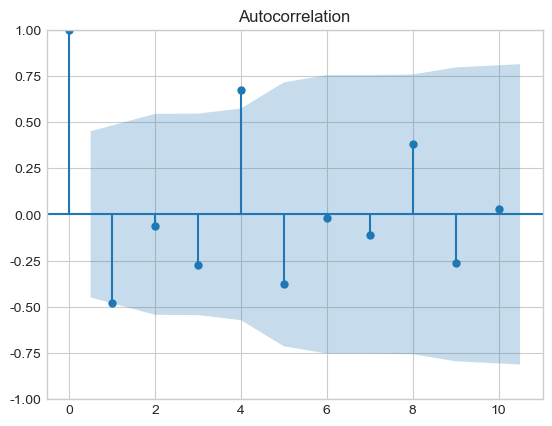

<Figure size 1200x800 with 0 Axes>

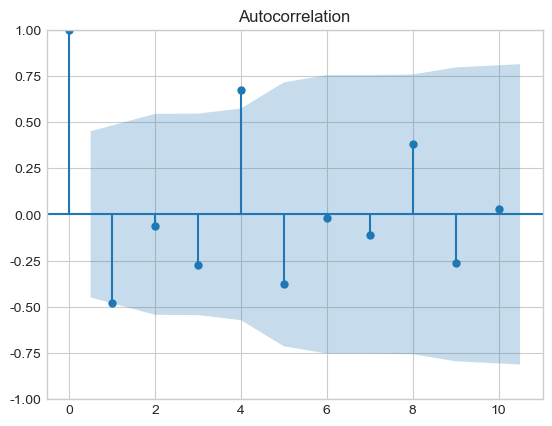

In [15]:
# 获取一阶差分销量
order_df['order_date'] = pd.to_datetime(order_df['order_date'])
order_df['quart'] = order_df['order_date'].dt.to_period('Q')
y = order_df.groupby('quart')['y'].sum().values
y_diff1 = order_df.groupby('quart')['y'].sum().diff(1).values[1:]
# 自相关
fig = plt.figure(figsize=(12, 8))
# ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(y_diff1, lags=10)
# # 差分自相关
# ax2 = fig.add_subplot(212)
# sm.graphics.tsa.plot_pacf(y_diff1, lags=10, ax=ax2)
# plt.show()

stl分解

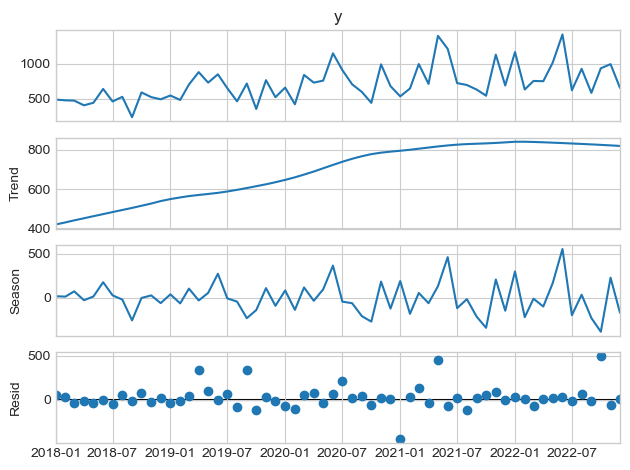

In [16]:
from statsmodels.tsa.seasonal import STL

stl = STL(order_df.set_index('order_date').y, period=12, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()
plt.show()
# plt.savefig('图片/{}.png'.format('1-7'), transparent=True)



#### 有监督学习和tsfresh

In [17]:
supervised_df = order_df[['SKU','order_date','y']].copy()
for i in range(12):
    supervised_df['{}'.format(i+1)] = supervised_df['y'].shift(i+1)
supervised_df = supervised_df.dropna(axis=0)

# 部分示例
print(supervised_df.iloc[:,:7])

supervised_df['SKU|order_date'] = supervised_df['SKU']+'|'+ supervised_df['order_date'].dt.strftime('%Y-%m-%d')
supervised_df = supervised_df.set_index('SKU|order_date')
supervised_df = supervised_df.drop(['SKU','order_date'],axis=1)


        SKU order_date     y       1       2       3       4
12  LG68552 2019-01-01   546   492.0   523.0   590.0   236.0
13  LG68552 2019-02-01   482   546.0   492.0   523.0   590.0
14  LG68552 2019-03-01   704   482.0   546.0   492.0   523.0
15  LG68552 2019-04-01   880   704.0   482.0   546.0   492.0
16  LG68552 2019-05-01   730   880.0   704.0   482.0   546.0
17  LG68552 2019-06-01   849   730.0   880.0   704.0   482.0
18  LG68552 2019-07-01   650   849.0   730.0   880.0   704.0
19  LG68552 2019-08-01   463   650.0   849.0   730.0   880.0
20  LG68552 2019-09-01   717   463.0   650.0   849.0   730.0
21  LG68552 2019-10-01   354   717.0   463.0   650.0   849.0
22  LG68552 2019-11-01   765   354.0   717.0   463.0   650.0
23  LG68552 2019-12-01   522   765.0   354.0   717.0   463.0
24  LG68552 2020-01-01   659   522.0   765.0   354.0   717.0
25  LG68552 2020-02-01   421   659.0   522.0   765.0   354.0
26  LG68552 2020-03-01   840   421.0   659.0   522.0   765.0
27  LG68552 2020-04-01  

In [18]:
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
# 取过去一年的月销量作为当期的训练特征，先将数据转化成有监督学习的格式

y = supervised_df['y']
# 从数据中删除目标y后，以SKU字段为ID、order_date字段为顺序参照，自动化提取特征
supervised_df = supervised_df.drop('y',axis=1).stack().reset_index()
supervised_df = supervised_df.rename(columns={'level_1':'sort_val',0:'val'})
extracted_features = extract_features(supervised_df, column_id="SKU|order_date",column_sort = 'sort_val')
# 用impute先进行插值
impute(extracted_features)
features_filtered = select_features(extracted_features, y)
print(extracted_features)

Feature Extraction: 100%|███████████████████████| 24/24 [00:02<00:00, 10.36it/s]
/Users/zhengxiaohang1/anaconda3/lib/python3.11/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['val__partial_autocorrelation__lag_6'
 'val__partial_autocorrelation__lag_7'
 'val__partial_autocorrelation__lag_8'
 'val__partial_autocorrelation__lag_9'
 'val__cwt_coefficients__coeff_12__w_2__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_12__w_5__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_12__w_10__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_12__w_20__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_13__w_5__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_13__w_10__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_13__w_20__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_14__w_2__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10,

                    val__variance_larger_than_standard_deviation  \
LG68552|2019-01-01                                           1.0   
LG68552|2019-02-01                                           1.0   
LG68552|2019-03-01                                           1.0   
LG68552|2019-04-01                                           1.0   
LG68552|2019-05-01                                           1.0   
LG68552|2019-06-01                                           1.0   
LG68552|2019-07-01                                           1.0   
LG68552|2019-08-01                                           1.0   
LG68552|2019-09-01                                           1.0   
LG68552|2019-10-01                                           1.0   
LG68552|2019-11-01                                           1.0   
LG68552|2019-12-01                                           1.0   
LG68552|2020-01-01                                           1.0   
LG68552|2020-02-01                              

## 预测实践

In [19]:
# 绘图配置参数
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-whitegrid')

/var/folders/zy/8k_65gtn70nfmssdhsky0fx80000gp/T/ipykernel_9119/3738808196.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [20]:
# 准确率指标计算
def mape(y,y_hat):
    '''
    :param y: 实际销量数据，float
    :param y_hat: 预测销量数据，float
    :return: 是否为趋势的结果，str
    '''
    if y == 0 and y_hat ==0:
        return 0
    elif y==0 or y_hat ==0:
        return 1
    return np.abs(y-y_hat)/np.abs(y)

### 指数移动平均

In [21]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 从原始数据中获取用于建模的销量时间序列数据
y_data = order_df.set_index('order_date').y

es_fit = ExponentialSmoothing(y_data[:-12], seasonal_periods=12, trend='add', seasonal='add').fit()
ets_y_hat = es_fit.forecast(12)

print(es_fit.summary())


# 准确率指标计算
def mape(y,y_hat):
    '''
    :param y: 实际销量数据，float
    :param y_hat: 预测销量数据，float
    :return: 是否为趋势的结果，str
    '''
    if y == 0 and y_hat ==0:
        return 0
    elif y==0 or y_hat ==0:
        return 1
    return np.abs(y-y_hat)/np.abs(y)

# 抽取验证集，和预测结果拼接
test_df = order_df[['order_date','y']][-12:]
test_df['y_hat'] = ets_y_hat.values
test_df['y_hat'] = 800
# 计算准确率
print(1-np.mean(test_df[['y','y_hat']].apply(lambda x:mape(x[0],x[1]),axis=1))) # 0.7768992944955736

                       ExponentialSmoothing Model Results                       
Dep. Variable:                        y   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                         936463.177
Optimized:                         True   AIC                            506.176
Trend:                         Additive   BIC                            536.115
Seasonal:                      Additive   AICC                           529.762
Seasonal Periods:                    12   Date:                 Wed, 10 Jan 2024
Box-Cox:                          False   Time:                         16:35:10
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1213081                alpha                 True
smoothing_trend          

/Users/zhengxiaohang1/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


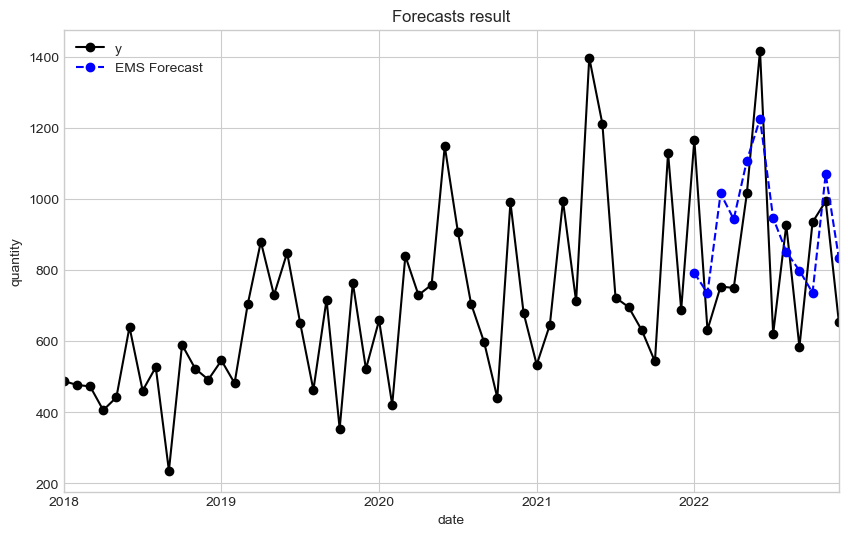

In [22]:
# 通过绘图查看预测情况
ax = y_data.plot(figsize=(10,6), marker='o', color='black', title="Forecasts result" , legend=True)
ax.set_ylabel("quantity")
ax.set_xlabel("date")
 
# For plotting fitted values
# EMA_fit.fittedvalues.plot(ax=ax, style='--', color='red')

es_fit.forecast(12).rename('EMS Forecast').plot(ax=ax, style='--',marker='o', color='blue', legend=True)
plt.show()

## arima

#### auto arima

In [23]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(y_data[:-12])
print(arima_model) # ARIMA(2,0,0)(0,0,0)[0] intercept
arima_y_hat, conf_int = arima_model.predict(n_periods=12,
                                           return_conf_int=True,
                                           alpha=0.05)
# 抽取验证集，和预测结果拼接
test_df = order_df[['order_date','y']][-12:]
test_df['y_hat'] = arima_y_hat.values
# 计算准确率
print(1-np.mean(test_df[['y','y_hat']].apply(lambda x:mape(x[0],x[1]),axis=1))) # 0.830

 ARIMA(0,1,1)(0,0,0)[0]          
0.773025406467713


In [24]:
arima_model

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

        1.start_p:p的起始值，自回归(“AR”)模型的阶数(或滞后时间的数量),必须是正整数
        2.start_q:q的初始值，移动平均(MA)模型的阶数。必须是正整数。
        3.max_p:p的最大值，必须是大于或等于start_p的正整数。
        4.max_q:q的最大值，必须是一个大于start_q的正整数
        5.seasonal:是否适合季节性ARIMA。默认是正确的。注意，如果season为真，而m == 1，则season将设置为False。
        6.stationary :时间序列是否平稳，d是否为零。
        6.information_criterion：信息准则用于选择最佳的ARIMA模型。(‘aic’，‘bic’，‘hqic’，‘oob’)之一
        7.alpha：检验水平的检验显著性，默认0.05
        8.test:如果stationary为假且d为None，用来检测平稳性的单位根检验的类型。默认为‘kpss’;可设置为adf
        9.n_jobs ：网格搜索中并行拟合的模型数(逐步=False)。默认值是1，但是-1可以用来表示“尽可能多”。
        10.suppress_warnings：statsmodel中可能会抛出许多警告。如果suppress_warnings为真，那么来自ARIMA的所有警告都将被压制
        11.error_action:如果由于某种原因无法匹配ARIMA，则可以控制错误处理行为。(warn,raise,ignore,trace)
        12.max_d:d的最大值，即非季节差异的最大数量。必须是大于或等于d的正整数。
        13.trace:是否打印适合的状态。如果值为False，则不会打印任何调试信息。值为真会打印一些

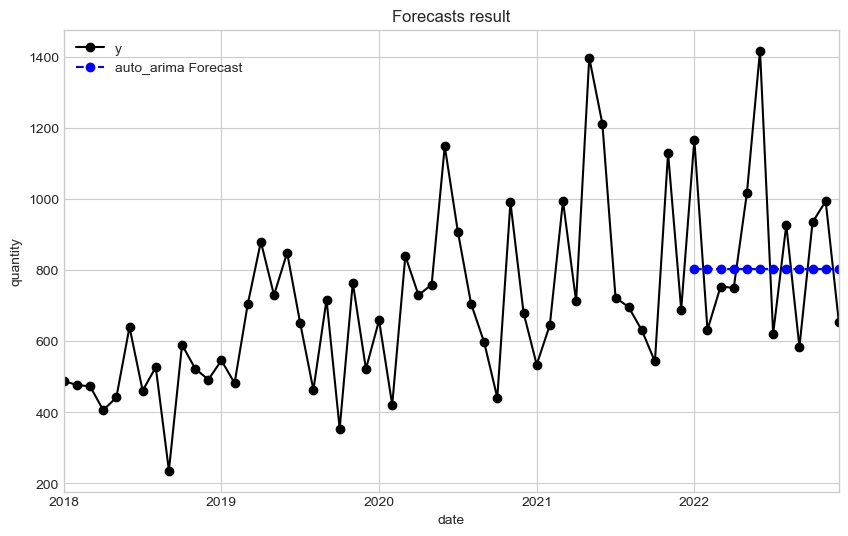

In [25]:
# 通过绘图查看预测情况
ax = y_data.plot(figsize=(10,6), marker='o', color='black', title="Forecasts result" , legend=True)
ax.set_ylabel("quantity")
ax.set_xlabel("date")
 
# For plotting fitted values
arima_y_hat.rename('auto_arima Forecast').plot(ax=ax, style='--',marker='o', color='blue', legend=True)
plt.show()

   ### XGB

In [26]:
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
# 取每个日期上过去一年的月销量作为当期的训练特征，将数据转化成有监督学习的格式
raw_df = order_df[['SKU','order_date','y']]
supervised_df = raw_df.copy()
for i in range(12):
    supervised_df['{}'.format(i+1)] = supervised_df['y'].shift(i+1)
# 对销量历史数据不满一年的早期样本行进行删除
supervised_df = supervised_df.dropna(axis=0)
supervised_df = supervised_df.set_index('order_date')
# 获取训练目标列y，用于后期特征选择
y = supervised_df['y']
# 删除无关列，将数据进行stack操作
supervised_df = supervised_df.drop(['SKU','y'],axis=1).stack().reset_index()
supervised_df = supervised_df.rename(columns={'level_1':'sort_val',0:'val'})
extracted_features = extract_features(supervised_df, column_id="order_date",column_sort = 'sort_val')
impute(extracted_features)
features_filtered = select_features(extracted_features, y)
print(extracted_features)

Feature Extraction: 100%|███████████████████████| 24/24 [00:02<00:00, 10.57it/s]
/Users/zhengxiaohang1/anaconda3/lib/python3.11/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['val__partial_autocorrelation__lag_6'
 'val__partial_autocorrelation__lag_7'
 'val__partial_autocorrelation__lag_8'
 'val__partial_autocorrelation__lag_9'
 'val__cwt_coefficients__coeff_12__w_2__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_12__w_5__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_12__w_10__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_12__w_20__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_13__w_5__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_13__w_10__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_13__w_20__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_14__w_2__widths_(2, 5, 10, 20)'
 'val__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10,

            val__variance_larger_than_standard_deviation  \
2019-01-01                                           1.0   
2019-02-01                                           1.0   
2019-03-01                                           1.0   
2019-04-01                                           1.0   
2019-05-01                                           1.0   
2019-06-01                                           1.0   
2019-07-01                                           1.0   
2019-08-01                                           1.0   
2019-09-01                                           1.0   
2019-10-01                                           1.0   
2019-11-01                                           1.0   
2019-12-01                                           1.0   
2020-01-01                                           1.0   
2020-02-01                                           1.0   
2020-03-01                                           1.0   
2020-04-01                              

[0]	train-rmse:235.05418	test-rmse:120.24940
[1]	train-rmse:219.22829	test-rmse:122.31341
[2]	train-rmse:206.49864	test-rmse:124.82761
[3]	train-rmse:193.28280	test-rmse:126.70916
[4]	train-rmse:183.68196	test-rmse:134.66956
[5]	train-rmse:175.06631	test-rmse:136.47802
[6]	train-rmse:162.02927	test-rmse:141.19535
[7]	train-rmse:158.59818	test-rmse:139.78576
[8]	train-rmse:150.69344	test-rmse:139.27628
[9]	train-rmse:143.95138	test-rmse:140.48711
0.8015166543455989
0.8015166543455989


<Axes: title={'center': 'Xgb Forecasts result'}, xlabel='date', ylabel='quantity'>

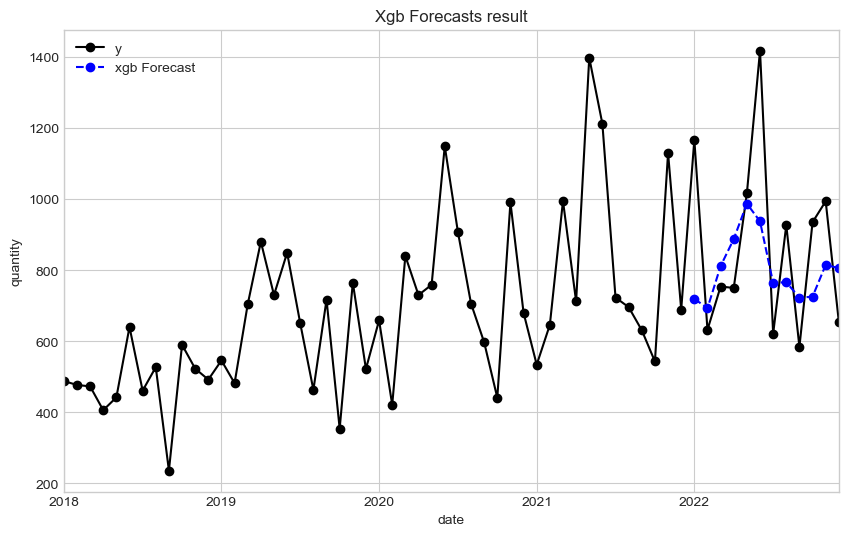

In [27]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# extracted_features为1.2.3探索性分析中使用tsfresh生成的特征
# y为每个月的销量数据
# 最后12个月为验证集，选取之前的作为训练集
train_x, test_x, train_y, test_y = train_test_split(extracted_features[:-12], y[:-12], random_state=0)
dtrain = xgb.DMatrix(train_x, label=train_y)
dtest = xgb.DMatrix(test_x, label=test_y)

# 封装常用的参数
params = {'max_depth': 10,
          'eta': 0.1,
          'subsample': 0.7,
          'colsample_bytree': 0.7,
          'verbosity': 0
          }
watchlist = [(dtrain,'train'), (dtest,'test')]
model = xgb.train(params,
                dtrain,
                num_boost_round= 50 ,
                early_stopping_rounds =10 ,
                evals=watchlist)
# 预测所用特征
pred_features = xgb.DMatrix(extracted_features[-12:])
xgb_y_hat = model.predict(pred_features)
# 抽取验证集，和预测结果拼接
test_df = order_df[['order_date','y']][-12:]
test_df['y_hat'] = xgb_y_hat
# 计算准确率
print(1-np.mean(test_df[['y','y_hat']].apply(lambda x:mape(x[0],x[1]),axis=1)))
# 抽取测试集，和预测结果拼接
test_df = order_df[['order_date','y']][-12:]
test_df['y_hat'] = xgb_y_hat
# 计算准确率
print(1-np.mean(test_df[['y','y_hat']].apply(lambda x:mape(x[0],x[1]),axis=1))) # 0.8427231638070866
xgb_y_hat_series =pd.Series(xgb_y_hat,index = pd.date_range('2022-01-01','2022-12-01',freq='MS'))
# 通过绘图查看预测情况
ax = y_data.plot(figsize=(10,6), marker='o', color='black', title="Xgb Forecasts result" , legend=True)
ax.set_ylabel("quantity")
ax.set_xlabel("date")
 
# For plotting fitted values
# EMA_fit.fittedvalues.plot(ax=ax, style='--', color='red')

xgb_y_hat_series.rename('xgb Forecast').plot(ax=ax, style='--',marker='o', color='blue', legend=True)


0.8015166543455989


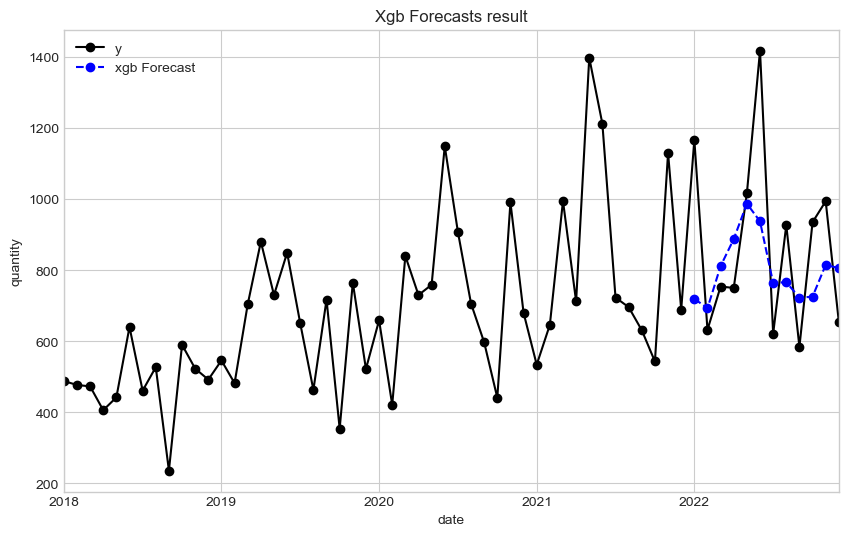

In [28]:
# 抽取验证集，和预测结果拼接
test_df = order_df[['order_date','y']][-12:]
test_df['y_hat'] = xgb_y_hat
# 计算准确率
print(1-np.mean(test_df[['y','y_hat']].apply(lambda x:mape(x[0],x[1]),axis=1))) # 0.8427231638070866
xgb_y_hat_series =pd.Series(xgb_y_hat,index = pd.date_range('2022-01-01','2022-12-01',freq='MS'))
# 通过绘图查看预测情况
ax = y_data.plot(figsize=(10,6), marker='o', color='black', title="Xgb Forecasts result" , legend=True)
ax.set_ylabel("quantity")
ax.set_xlabel("date")
 
# For plotting fitted values
# EMA_fit.fittedvalues.plot(ax=ax, style='--', color='red')

xgb_y_hat_series.rename('xgb Forecast').plot(ax=ax, style='--',marker='o', color='blue', legend=True)
plt.show()